### Import Dependencies

In [1]:
#Data manipulation
import pandas as pd
import numpy as np
from time import time
import datetime
from path import Path

# Import packages
import math, re, IPython

#Data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from pprint import pprint

#Import automatic learning packages
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import export_graphviz


In [2]:
# Loading data
file_path = Path("BTC_snap_hourly.csv")
btc_df = pd.read_csv(file_path)
btc_df.head()

,Date,Open,High,Low,Last
0,11/9/2020 3:00,15539.15,15588.37,15448.60,15479.00
1,11/9/2020 4:00,15483.44,15500.02,15398.99,15453.22
2,11/9/2020 5:00,15453.22,15459.15,15365.80,15369.90
3,11/9/2020 6:00,15403.11,15512.47,15319.21,15488.27
4,11/9/2020 7:00,15491.50,15492.00,15366.50,15400.57


In [3]:
btc_df.dtypes

Date     object
Open    float64
High    float64
Low     float64
Last    float64
dtype: object

In [4]:
# Converting Dates into a Datetime Format
btc_df["Date"] = pd.to_datetime(btc_df.Date)
btc_df.dtypes

Date    datetime64[ns]
Open           float64
High           float64
Low            float64
Last           float64
dtype: object

In [5]:
# Setting dates as the index
btc_df.set_index('Date', inplace=True)
btc_df.head()

,Open,High,Low,Last
Date,,,,
2020-11-09 03:00:00,15539.15,15588.37,15448.60,15479.00
2020-11-09 04:00:00,15483.44,15500.02,15398.99,15453.22
2020-11-09 05:00:00,15453.22,15459.15,15365.80,15369.90
2020-11-09 06:00:00,15403.11,15512.47,15319.21,15488.27
2020-11-09 07:00:00,15491.50,15492.00,15366.50,15400.57


In [6]:
# Selecting only the Closing Price as well as the dates starting from January 2017.
# This is the time when Bitcoin and Cryptocurrency in general started to become popular to trade and is 
# probably a better representation of current crypto trading trends.

btc_df = btc_df.loc['2020-11-09':]
btc_df.head()

,Open,High,Low,Last
Date,,,,
2020-11-09 03:00:00,15539.15,15588.37,15448.60,15479.00
2020-11-09 04:00:00,15483.44,15500.02,15398.99,15453.22
2020-11-09 05:00:00,15453.22,15459.15,15365.80,15369.90
2020-11-09 06:00:00,15403.11,15512.47,15319.21,15488.27
2020-11-09 07:00:00,15491.50,15492.00,15366.50,15400.57


In [7]:
print(btc_df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8747 entries, 2020-11-09 03:00:00 to 2021-11-09 03:00:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    8747 non-null   float64
 1   High    8747 non-null   float64
 2   Low     8747 non-null   float64
 3   Last    8747 non-null   float64
dtypes: float64(4)
memory usage: 341.7 KB
None


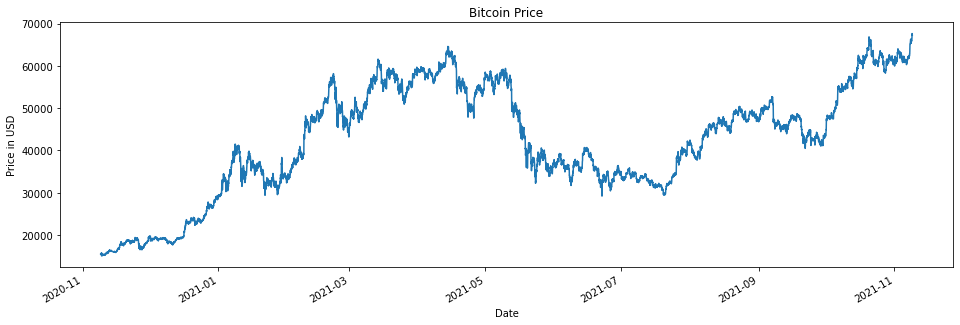

In [8]:
# Plotting Bitcoin's Historical Prices
btc_df['Last'].plot(figsize=(16,5))

plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.title('Bitcoin Price')
plt.savefig('btcprice.png')


plt.show()

In [9]:
# Define the features set.
X = btc_df.copy()
X = X.drop("Last", axis=1)
X.head()

,Open,High,Low
Date,,,
2020-11-09 03:00:00,15539.15,15588.37,15448.60
2020-11-09 04:00:00,15483.44,15500.02,15398.99
2020-11-09 05:00:00,15453.22,15459.15,15365.80
2020-11-09 06:00:00,15403.11,15512.47,15319.21
2020-11-09 07:00:00,15491.50,15492.00,15366.50


In [10]:
# Define the target set.
y = btc_df["Last"].ravel()
y[:5]

array([15479.  , 15453.22, 15369.9 , 15488.27, 15400.57])

The most important variables will be studied, trying to determine which independent variables have the greatest effect on the model:

In [11]:
# Correlation among variables
btc_df.corr()

,Open,High,Low,Last
Open,1.000000,0.999773,0.999630,0.999549
High,0.999773,1.000000,0.999472,0.999761
Low,0.999630,0.999472,1.000000,0.999691
Last,0.999549,0.999761,0.999691,1.000000


In [65]:
# Data analysis
btc_df.describe()

,Open,High,Low,Last
count,8747.000000,8747.000000,8747.000000,8747.000000
mean,42501.301817,42785.736910,42192.235314,42506.951234
std,13065.272789,13120.279349,13012.562571,13064.620093
min,15010.000000,15142.560000,14818.000000,15010.000000
25%,33786.010000,34035.010000,33518.060000,33790.055000
50%,43740.500000,44108.010000,43435.100000,43756.570000
75%,54180.475000,54538.920000,53773.650000,54187.225000
max,67634.200000,67833.970000,67364.940000,67658.020000


In [66]:
# Split the data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=78, shuffle=False)

In [67]:
print('Training Features Shape', X_train.shape)
print('Training Labels Shape', y_train.shape)
print('Training Features Shape', X_test.shape)
print('Training Labels Shape', y_test.shape)

Training Features Shape (6997, 3)
Training Labels Shape (6997,)
Training Features Shape (1750, 3)
Training Labels Shape (1750,)


In [68]:
# RMSE and print_score functions to calculate RMSE and check R^2 on the two sets
def rmse(x,y): return math.sqrt(((x-y)**2).mean())
def print_score(m):
    res = [rmse(m.predict(X_train), y_train),
          rmse(m.predict(X_test), y_test),
              m.score(X_train, y_train),
              m.score(X_test, y_test)]
    print(f"RMSE train set: {res[0]} \nRMSE test set: {res[1]} \nR^2 train set: {res[2]} \nR^2 test set: {res[3]}")

In [69]:
# Creation of the model
# Se crea este primer modelo con parámetros por default excepto random_state
btc_model = RandomForestRegressor(random_state=78)

In [70]:
# Fitting the model
btc_model.fit(X_train, y_train)

RandomForestRegressor(random_state=78)

In [71]:
print_score(btc_model)

RMSE train set: 78.85479102789446 
RMSE test set: 342.8933666008689 
R^2 train set: 0.9999624008760989 
R^2 test set: 0.997900191013612


In [72]:
# The model is modified to obtain better results
modified_btc_model = RandomForestRegressor(n_estimators=200, random_state=78)

In [73]:
modified_btc_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=78)

In [74]:
print_score(modified_btc_model)

RMSE train set: 77.99636146139454 
RMSE test set: 343.5462147028196 
R^2 train set: 0.999963215043926 
R^2 test set: 0.9978921875848008


In [22]:
# Return MAE, MRSE, R^2, Adjusted R^2
def reg_acc(y_true, y_pre):
    return_var = []
    from math import sqrt
    rmse = sqrt(mean_squared_error(y_true,y_pre))
    return_var.append(rmse)
    print("RMSE: ",rmse)
    r2 = r2_score(y_true,y_pre)
    return_var.append(r2)
    print("R2: ",r2)
    mae = mean_absolute_error(y_true,y_pre)
    return_var.append(mae)
    print("MAE: ",mae)
    
    if 0 in y_true:
        print("MAPE can not be calculated")
        return_var_append(0)
    else:
        mape = round(np.mean(np.abs((y_true - y_pre)/y_true))*100,4)
        print("MAPE :", mape)
        print("=============================")
        print("Model Accuracy(%) :", 100-mape)
        return_var.append(mape)
        return_var.append(100-mape)
    return return_var


In [45]:
# Lookinf for the best N estimators, parameters by default
random_tree = [i*10 for i in range(1,30)]
rmse, r_sq, mae, mape = [],[],[],[]
for tree_size in random_tree:
    print('Tree Size:', tree_size)
    model = RandomForestRegressor(random_state=42, n_estimators=int(tree_size)).fit(X_train, y_train)
    model.fit(X_train, y_train)
    estimation = model.predict(X_test)
    result = reg_acc(y_test, estimation)
    rmse.append(result[0])
    r_sq.append(result[1])
    mae.append(result[2])
    mape.append(result[3])

Tree Size: 10
RMSE:  332.87792812710103
R2:  0.9980210645783051
MAE:  191.5012485714284
MAPE : 0.3502
Model Accuracy(%) : 99.6498
Tree Size: 20
RMSE:  336.86755112910146
R2:  0.997973344266495
MAE:  188.71717571428564
MAPE : 0.3446
Model Accuracy(%) : 99.6554
Tree Size: 30
RMSE:  344.77795292781474
R2:  0.9978770459397838
MAE:  190.5199819047622
MAPE : 0.3472
Model Accuracy(%) : 99.6528
Tree Size: 40
RMSE:  342.0951239175366
R2:  0.9979099561844078
MAE:  190.04713357142901
MAPE : 0.3466
Model Accuracy(%) : 99.6534
Tree Size: 50
RMSE:  342.73339106854917
R2:  0.9979021498715689
MAE:  189.47614537142937
MAPE : 0.3451
Model Accuracy(%) : 99.6549
Tree Size: 60
RMSE:  341.7963134576937
R2:  0.9979136057786676
MAE:  188.61420752381062
MAPE : 0.3435
Model Accuracy(%) : 99.6565
Tree Size: 70
RMSE:  341.7839854920233
R2:  0.9979137562807735
MAE:  188.8772378775526
MAPE : 0.3442
Model Accuracy(%) : 99.6558
Tree Size: 80
RMSE:  342.3696406743704
R2:  0.997906600496381
MAE:  189.38822050000132
MAP

<AxesSubplot:title={'center':'RMSE'}, xlabel='Number of trees', ylabel='RMSE'>

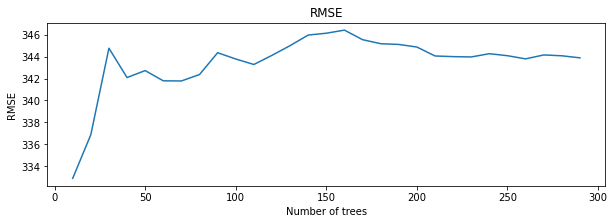

In [46]:
# The results can be seen graphically:
plt.figure(figsize=(10,3))
plt.title("RMSE")
plt.xlabel("Number of trees")
plt.ylabel("RMSE")
sns.lineplot(x=random_tree,y=rmse)

<AxesSubplot:title={'center':'MAE'}, xlabel='Number of trees', ylabel='RMSE'>

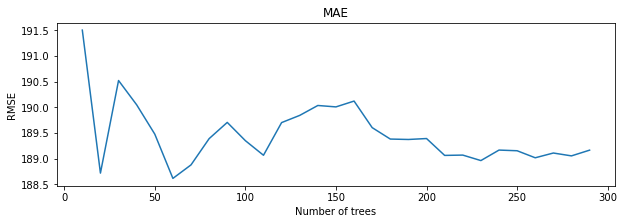

In [47]:
# The results can be seen graphically:
plt.figure(figsize=(10,3))
plt.title("MAE")
plt.xlabel("Number of trees")
plt.ylabel("RMSE")
sns.lineplot(x=random_tree,y=mae)

<AxesSubplot:title={'center':'MAPE'}, xlabel='Number of trees', ylabel='RMSE'>

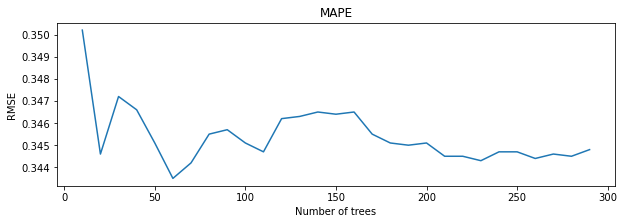

In [48]:
# The results can be seen graphically:
plt.figure(figsize=(10,3))
plt.title("MAPE")
plt.xlabel("Number of trees")
plt.ylabel("RMSE")
sns.lineplot(x=random_tree,y=mape)

<AxesSubplot:title={'center':'R2'}, xlabel='Number of trees', ylabel='RMSE'>

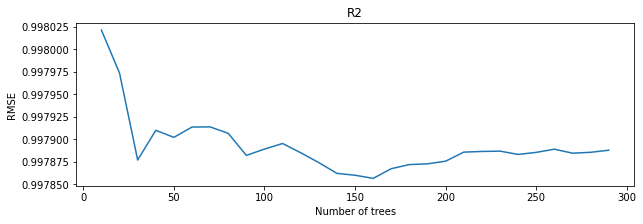

In [49]:
# The results can be seen graphically:
plt.figure(figsize=(10,3))
plt.title("R2")
plt.xlabel("Number of trees")
plt.ylabel("RMSE")
sns.lineplot(x=random_tree,y=r_sq)

In [44]:
# Lookinf for the best N estimators, parameters by default
depth_size = [i for i in range(1,30)]
rmse, r_sq, mae, mape = [],[],[],[]
for max_depth in depth_size:
    print('Depth Size:', max_depth)
    model = RandomForestRegressor(random_state=42, max_depth=int(max_depth)).fit(X_train, y_train)
    model.fit(X_train, y_train)
    estimation = model.predict(X_test)
    result = reg_acc(y_test, estimation)
    rmse.append(result[0])
    r_sq.append(result[1])
    mae.append(result[2])
    mape.append(result[3])

Depth Size: 1
RMSE:  7251.087933038831
R2:  0.06099486685749744
MAE:  6619.79345986379
MAPE : 12.5544
Model Accuracy(%) : 87.4456
Depth Size: 2
RMSE:  3582.24856883795
R2:  0.7708219296133894
MAE:  2968.7425864426796
MAPE : 5.4996
Model Accuracy(%) : 94.5004
Depth Size: 3
RMSE:  2149.999227445787
R2:  0.9174459791904069
MAE:  1683.005737744454
MAPE : 3.1054
Model Accuracy(%) : 96.8946
Depth Size: 4
RMSE:  992.3031485011011
R2:  0.9824146765222205
MAE:  698.8831319623542
MAPE : 1.3012
Model Accuracy(%) : 98.6988
Depth Size: 5
RMSE:  621.4605191585824
R2:  0.9931025476357562
MAE:  348.5374089051703
MAPE : 0.628
Model Accuracy(%) : 99.372
Depth Size: 6
RMSE:  468.05077173401077
R2:  0.9960875612278736
MAE:  247.10632271717387
MAPE : 0.4482
Model Accuracy(%) : 99.5518
Depth Size: 7
RMSE:  389.2440770871458
R2:  0.9972941379695504
MAE:  214.10253644230897
MAPE : 0.3902
Model Accuracy(%) : 99.6098
Depth Size: 8
RMSE:  351.9129426407102
R2:  0.9977882700345873
MAE:  197.4970897764744
MAPE : 0

<AxesSubplot:title={'center':'RMSE'}, xlabel='Number of trees', ylabel='RMSE'>

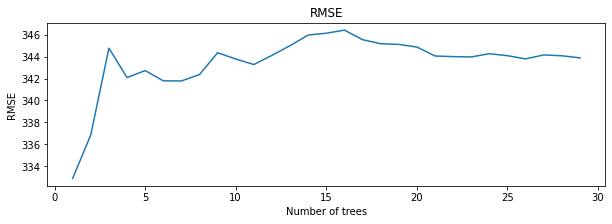

In [50]:
# The results can be seen graphically:
plt.figure(figsize=(10,3))
plt.title("RMSE")
plt.xlabel("Number of trees")
plt.ylabel("RMSE")
sns.lineplot(x=depth_size,y=rmse)

<AxesSubplot:title={'center':'MAPE'}, xlabel='Number of trees', ylabel='RMSE'>

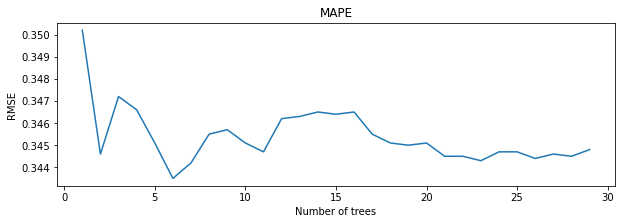

In [53]:
plt.figure(figsize=(10,3))
plt.title("MAPE")
plt.xlabel("Number of trees")
plt.ylabel("RMSE")
sns.lineplot(x=depth_size,y=mape)

<AxesSubplot:title={'center':'R2'}, xlabel='Number of trees', ylabel='RMSE'>

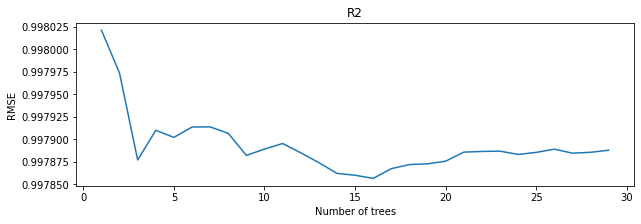

In [54]:
plt.figure(figsize=(10,3))
plt.title("R2")
plt.xlabel("Number of trees")
plt.ylabel("RMSE")
sns.lineplot(x=depth_size,y=r_sq)

<AxesSubplot:title={'center':'MAE'}, xlabel='Number of trees', ylabel='RMSE'>

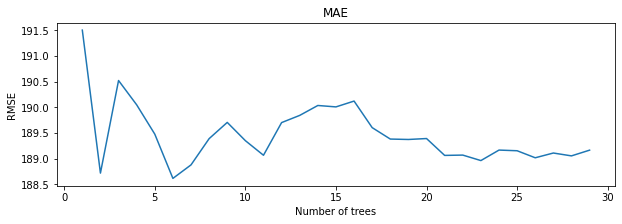

In [55]:
plt.figure(figsize=(10,3))
plt.title("MAE")
plt.xlabel("Number of trees")
plt.ylabel("RMSE")
sns.lineplot(x=depth_size,y=mae)

In [ ]:
# De todas las posibilidades la profundidad 22 y 10 árboles, ya que son los caos en los que se tiene menor RMSE y mayor R2,
# con lo cual se obtiene un modelo en el que se busco minimizar los errores y maximizar el coeficiente de determinación.

In [75]:
# Definitive model
definitive_btc_model = RandomForestRegressor(n_estimators=10, max_depth=6, random_state=78)

In [77]:
definitive_btc_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, n_estimators=10, random_state=78)

In [78]:
print_score(modified_btc_model)

RMSE train set: 77.99636146139454 
RMSE test set: 343.5462147028196 
R^2 train set: 0.999963215043926 
R^2 test set: 0.9978921875848008


In [84]:
# Making predictions using the testing data.
predictions = definitive_btc_model.predict(X_test)

In [85]:
predictions

array([48982.63288891, 48982.63288891, 48982.63288891, ...,
       63707.41616631, 63707.41616631, 63707.41616631])

In [86]:
# Error de test del modelo definitivo inicial
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predictions,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 469.7847813306227


In [ ]:
ValueError: continuous is not supported

In [100]:
# Ajuste de hiperparámetros
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500)]
max_features = ['auto', 'sqrt', None]
max_depth = [int(x) for x in np.linspace(5, 50, num = 45)]
max_depth.append(None)
min_samples_split = [2, 4, 6, 8, 10]
min_samples_leaf = [1, 2, 4, 6, 8, 10, 12, 14, 16, 20, 25, 30]
bootstrap = [True]
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depht': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500], 'max_features': ['auto', 'sqrt', None], 'max_depht': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, None], 'min_samples_split': [2, 4, 6, 8, 10], 'min_samples_leaf': [1, 2, 4, 6, 8, 10, 12, 14, 16, 20, 25, 30], 'bootstrap': [True]}


In [103]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [1]:
# Use the random grid to search the best hyperparameters
# rf_random = RandomizedSearchCV(RandomForestRegressor(random_state = 78), param_distributions = random_grid, n_iter = 100,
                               # scoring='neg_mean_squared_error', n_jobs=-1, refit=True, cv=3, verbose=2, random_state=78, return_train_score=False)
# rf_random.fit(X_train, y_train)